In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-fulltext-and-category/bbc-text.csv


In [2]:
df = pd.read_csv("/kaggle/input/bbc-fulltext-and-category/bbc-text.csv")

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df['target'] = df['category'].astype('category').cat.codes
df.head()

,category,text,target
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


In [5]:
K = df['target'].max() + 1
K

5

In [6]:
from sklearn.model_selection import train_test_split as tts

df_train, df_test = tts(df, test_size = 0.3)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_VOCAB_SIZE = 2000
t = Tokenizer(num_words = MAX_VOCAB_SIZE)
t.fit_on_texts(df_train['text'])
train_seq = t.texts_to_sequences(df_train['text'])
test_seq = t.texts_to_sequences(df_test['text'])

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [8]:
word2idx = t.word_index
V = len(word2idx)
V

25597

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_train = pad_sequences(train_seq)

T = data_train.shape[1]

In [10]:
data_test = pad_sequences(test_seq, maxlen=T)
data_test.shape

(668, 2897)

In [11]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [12]:
D = 50

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i,x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2897)]            0         
                                                                 
 embedding (Embedding)       (None, 2897, 50)          1279900   
                                                                 
 conv1d (Conv1D)             (None, 2895, 32)          4832      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 1,284,897
Trainable params: 1,284,897
Non-trainable params: 0
___________________________________________________

In [14]:
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [15]:
r = model.fit(
    data_train,
    df_train['target'],
    epochs = 50,
    validation_data = (data_test, df_test['target'])
)

Epoch 1/50
49/49 [==============================] - 6s 112ms/step - loss: 1.5772 - accuracy: 0.3526 - val_loss: 1.5051 - val_accuracy: 0.7440
Epoch 2/50
49/49 [==============================] - 5s 106ms/step - loss: 1.3666 - accuracy: 0.8298 - val_loss: 1.2174 - val_accuracy: 0.8533
Epoch 3/50
49/49 [==============================] - 5s 110ms/step - loss: 0.9613 - accuracy: 0.9030 - val_loss: 0.7458 - val_accuracy: 0.9177
Epoch 4/50
49/49 [==============================] - 5s 110ms/step - loss: 0.5184 - accuracy: 0.9338 - val_loss: 0.4134 - val_accuracy: 0.9296
Epoch 5/50
49/49 [==============================] - 5s 106ms/step - loss: 0.2752 - accuracy: 0.9589 - val_loss: 0.2778 - val_accuracy: 0.9416
Epoch 6/50
49/49 [==============================] - 5s 106ms/step - loss: 0.1700 - accuracy: 0.9788 - val_loss: 0.2277 - val_accuracy: 0.9401
Epoch 7/50
49/49 [==============================] - 5s 106ms/step - loss: 0.1147 - accuracy: 0.9859 - val_loss: 0.2009 - val_accuracy: 0.9431
Epoch 

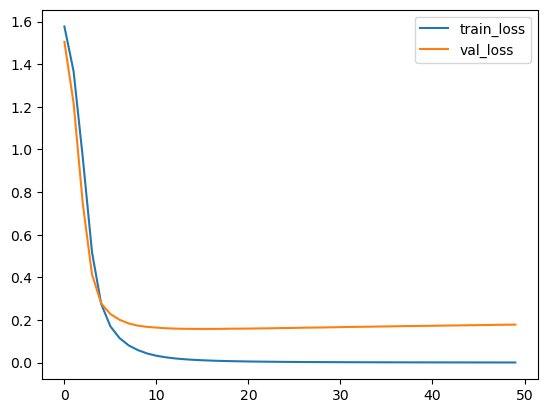

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend();

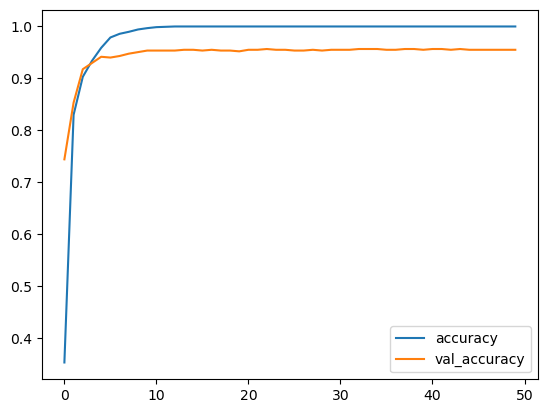

In [17]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend();